**Libraries**

In [ ]:
import pandas as pd 
import numpy as np 

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 5]

#NLTK libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Machine Learning libraries
import sklearn 
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.pipeline import Pipeline

#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


#Miscellanous libraries
from collections import Counter

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

Importing files

In [ ]:
Suicide = pd.read_csv('Suicide_Detection.csv')
Test_Suicide = pd.read_csv('test.csv')

In [ ]:
from IPython.display import Image
Image(url='https://www.google.com/url?sa=i&url=https%3A%2F%2Fmedium.com%2Fanalytics-vidhya%2Fusing-interactive-visualizations-to-analyze-suicide-data-18e5a615f123&psig=AOvVaw36K_PzuLAWbZO_JuqAu_SH&ust=1669854293174000&source=images&cd=vfe&ved=0CA8QjRxqFwoTCPDS65HS1PsCFQAAAAAdAAAAABAK')

In [ ]:
Image(open('line.gif','rb').read())

FileNotFoundError: ignored

# Data Filtering

In [ ]:
Test_Suicide["class"] = "Suicide"

In [ ]:
Suicide.drop('Unnamed: 0', axis = 1, inplace=True)

In [ ]:
Test_Suicide.drop('id', axis = 1, inplace=True)

In [ ]:
frames = [Suicide,Test_Suicide]

In [ ]:
data = pd.concat(frames)

In [ ]:
data.head()

,text,class
0,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,Am I weird I don't get affected by compliments...,non-suicide
2,Finally 2020 is almost over... So I can never ...,non-suicide
3,i need helpjust help me im crying so hard,suicide
4,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


Shuffling

In [ ]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

Lower case

In [ ]:
for columns in data.columns:
    data[columns] = data[columns].str.lower() 

Counting

In [ ]:
data['class'].value_counts()

suicide        116535
non-suicide    116037
Name: class, dtype: int64

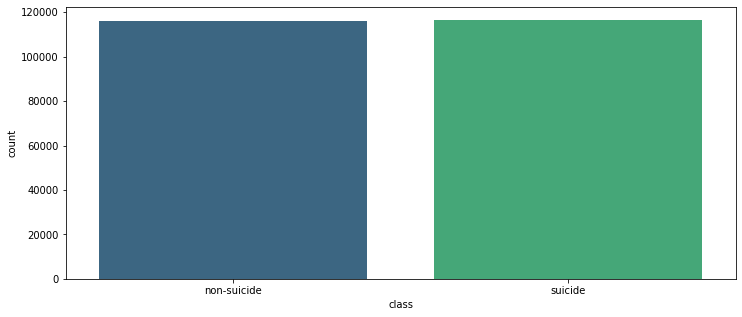

In [ ]:
plt.figure(figsize=(12,5))
sns.countplot(data['class'], palette = 'viridis')
plt.show()

In [ ]:
data["result"] = np.where(data["class"] == "suicide",1,0)

In [ ]:
data.head()

,text,class,result
0,guys no way this happend!!! believe it or not ...,non-suicide,0
1,help me do an april fools prank on my boyfrien...,non-suicide,0
2,there’s 1 million ants per one person ants cou...,non-suicide,0
3,anyone that has a ps4 so i’m getting a 2 terab...,non-suicide,0
4,never been so ready...i have been suffering th...,suicide,1


Sentiment Analysis

In [ ]:
from textblob import TextBlob

In [ ]:
def sentiment_calc(text):
    try:
        return TextBlob(text).polarity
    except:
        return None

data['polarity'] = data['text'].apply(sentiment_calc)

In [ ]:
def sentiment_calc(text):
    try:
        return TextBlob(text).subjectivity
    except:
        return None

data['subjectivity'] = data['text'].apply(sentiment_calc)

In [ ]:
data.fillna

<bound method DataFrame.fillna of                                                      text        class  \
0       guys no way this happend!!! believe it or not ...  non-suicide   
1       help me do an april fools prank on my boyfrien...  non-suicide   
2       there’s 1 million ants per one person ants cou...  non-suicide   
3       anyone that has a ps4 so i’m getting a 2 terab...  non-suicide   
4       never been so ready...i have been suffering th...      suicide   
...                                                   ...          ...   
232567  how can olive oil be extra virgin??? i guess i...  non-suicide   
232568  i finally did it!! after a year with my learne...  non-suicide   
232569  guys don't randomly unplug your fan when it's ...  non-suicide   
232570  totaled my car todayi’m literally about to giv...      suicide   
232571  please, help me.i am a sophomore in high-schoo...      suicide   

        result  polarity  subjectivity  
0            0  0.000000      0.0000

In [ ]:
data.head()

,text,class,result,polarity,subjectivity
0,guys no way this happend!!! believe it or not ...,non-suicide,0,0.000000,0.000000
1,help me do an april fools prank on my boyfrien...,non-suicide,0,0.297500,0.737778
2,there’s 1 million ants per one person ants cou...,non-suicide,0,-0.200000,0.400000
3,anyone that has a ps4 so i’m getting a 2 terab...,non-suicide,0,-0.038462,0.184615
4,never been so ready...i have been suffering th...,suicide,1,0.006250,0.388333


In [ ]:
data1 = data.copy()

Data Processing

In [ ]:
import pandas as pd
import numpy as np 
from tabulate import tabulate
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import metrics
import nltk
import re
import string
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import metrics
nltk.download('vader_lexicon')
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections

#import tweepy as tw
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob

import warnings
warnings.filterwarnings("ignore")

sns.set(font_scale=1.5)
sns.set_style("whitegrid")


In [ ]:
TextBlob("").sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [ ]:
data1.head()

,text,class,result,polarity,subjectivity
0,guys no way this happend!!! believe it or not ...,non-suicide,0,0.000000,0.000000
1,help me do an april fools prank on my boyfrien...,non-suicide,0,0.297500,0.737778
2,there’s 1 million ants per one person ants cou...,non-suicide,0,-0.200000,0.400000
3,anyone that has a ps4 so i’m getting a 2 terab...,non-suicide,0,-0.038462,0.184615
4,never been so ready...i have been suffering th...,suicide,1,0.006250,0.388333


Data Analysis

In [ ]:
data1 = data.copy()

In [ ]:
data1['text'] = data1['text'].astype(str)

In [ ]:
data1.head()

,text,class,result,polarity,subjectivity
0,guys no way this happend!!! believe it or not ...,non-suicide,0,0.000000,0.000000
1,help me do an april fools prank on my boyfrien...,non-suicide,0,0.297500,0.737778
2,there’s 1 million ants per one person ants cou...,non-suicide,0,-0.200000,0.400000
3,anyone that has a ps4 so i’m getting a 2 terab...,non-suicide,0,-0.038462,0.184615
4,never been so ready...i have been suffering th...,suicide,1,0.006250,0.388333


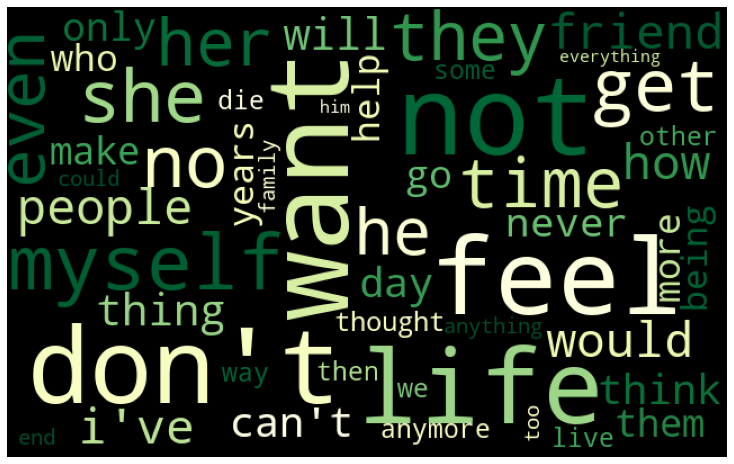

In [ ]:
from wordcloud import WordCloud

stopwords=['hey','fuck','fucking','u','are','s', 'have', 'this', 'to', 'in', 'of','but','put','any', 
           'the', 'that','an', 'so', 'with','was','sti ','I\'m', 'wanna', 'NaN', 'goin', 'now', 'sti', 
           'just', 'was', 'really', 'and', 'text', 'since', 'all', 'why', 'up', 'object', 'Length', 
           'actually', 'dtype', 'fact', 'abou ','Name', 'took', 'made', 'at', 'for', 'everytime','somehow', 
           'all', 'out', 'a', 'do', 'post', 'it', 'is', 'me', 'am', 'like', 'om', 'you', 'been', 
           'because', 'when', 'what', 'about', 'say', 'on', 't', 'from', 'ha', 'm', 'can', 'one', 'don', 
           'year', 'be', 'im', 'there', 'much','see', 'n', 've', 'know', 'going', 'or', 'if', 'as', 'off',
           'ago','has', 'here', 'my', 'i', 'I\'m', 'it', 'had', 'keep']

sdata = data1[data1["class"] == "suicide"]
all_words = ' '.join([text for text in sdata.text])
img = WordCloud(width = 640, height = 400,
               background_color = 'Black', colormap = 'YlGn',
               stopwords =stopwords,
               max_words= 50,
               max_font_size=100,
               random_state= 20,
               collocations=False).generate(all_words)

plt.figure(figsize=(10,20))
plt.subplots_adjust(left=0, right=1,top=1, bottom=0)
plt.imshow(img)
plt.axis('off')

plt.show()

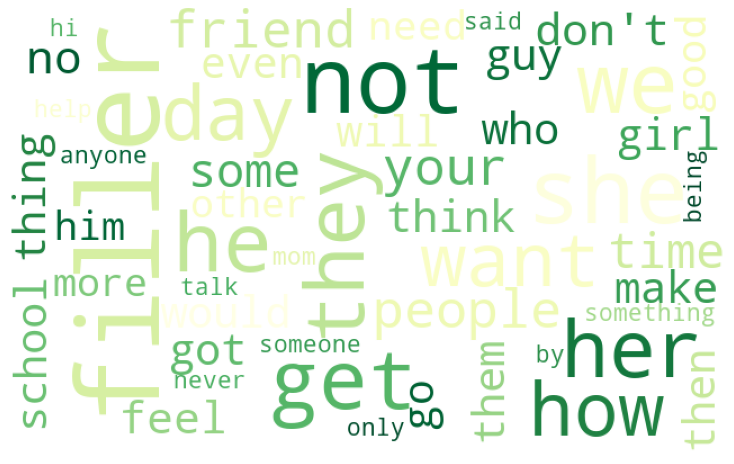

In [ ]:
from wordcloud import WordCloud

stopwords=['hey','fuck','fucking','u','are','s', 'have', 'this', 'to', 'in', 'of','but','put','any', 
           'the', 'that','an', 'so', 'with','was','sti ','I\'m', 'wanna', 'NaN', 'goin', 'now', 'sti', 
           'just', 'was', 'really', 'and', 'text', 'since', 'all', 'why', 'up', 'object', 'Length', 
           'actually', 'dtype', 'fact', 'abou ','Name', 'took', 'made', 'at', 'for', 'everytime','somehow', 
           'all', 'out', 'a', 'do', 'post', 'it', 'is', 'me', 'am', 'like', 'om', 'you', 'been', 
           'because', 'when', 'what', 'about', 'say', 'on', 't', 'from', 'ha', 'm', 'can', 'one', 'don', 
           'year', 'be', 'im', 'there', 'much','see', 'n', 've', 'know', 'going', 'or', 'if', 'as', 'off',
           'ago','has', 'here', 'my', 'i', 'I\'m', 'it', 'had', 'keep']

nsdata = data1[data1["class"] == "non-suicide"]
all_words = ' '.join([text for text in nsdata.text])
img = WordCloud(width = 640, height = 400,
               background_color = 'White', colormap = 'YlGn',
               stopwords =stopwords,
               max_words= 50,
               max_font_size=100,
               random_state= 20,
               collocations=False).generate(all_words)

plt.figure(figsize=(10,20))
plt.subplots_adjust(left=0, right=1,top=1, bottom=0)
plt.imshow(img)
plt.axis('off')

plt.show()

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data1['text'] = data1['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'lightgreen')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

Data Visualization

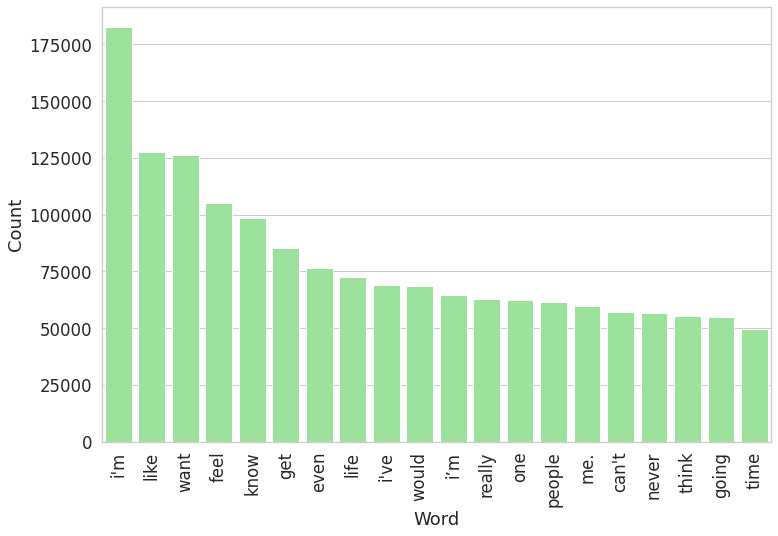

In [ ]:
counter(data1[data1["class"] == "suicide"], "text", 20)

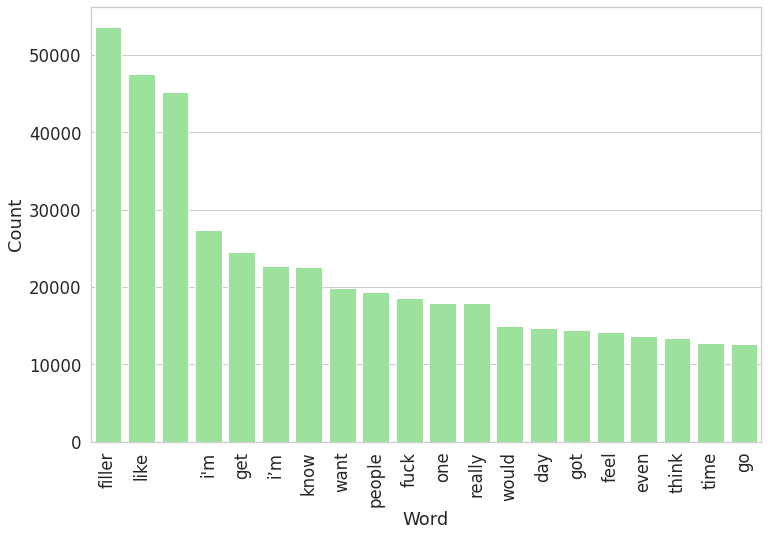

In [ ]:
counter(data1[data1["class"] == "non-suicide"], "text", 20)

Text(0.5, 1.0, 'Suicide vs Non-Suicide - Polarity')

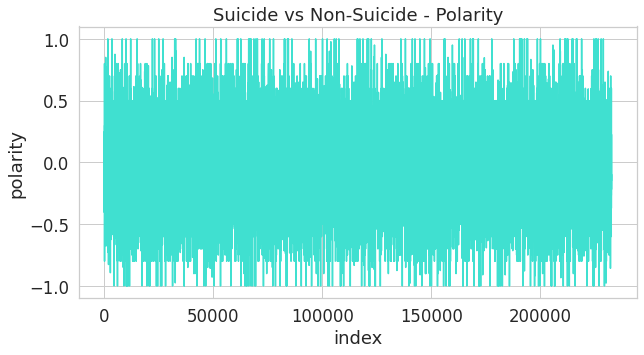

In [ ]:
sdata['polarity'].plot(color='turquoise')
plt.xlabel('index')
plt.ylabel('polarity')
plt.title('Suicide vs Non-Suicide - Polarity')

Text(0, 0.5, 'polarity')

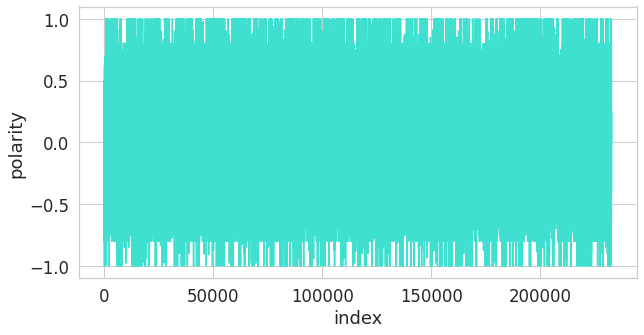

In [ ]:
nsdata['polarity'].plot(color='turquoise')
plt.xlabel('index')
plt.ylabel('polarity')

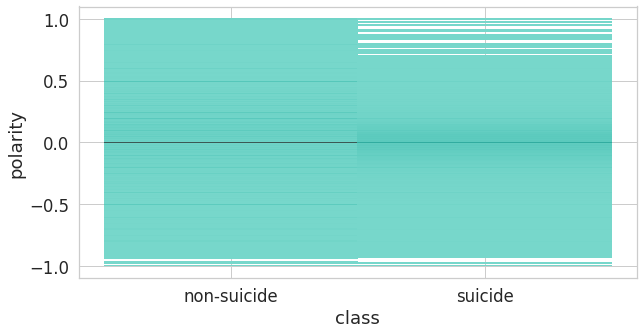

In [ ]:
sns.histplot(x='class',y='polarity',data=data1, color='turquoise')

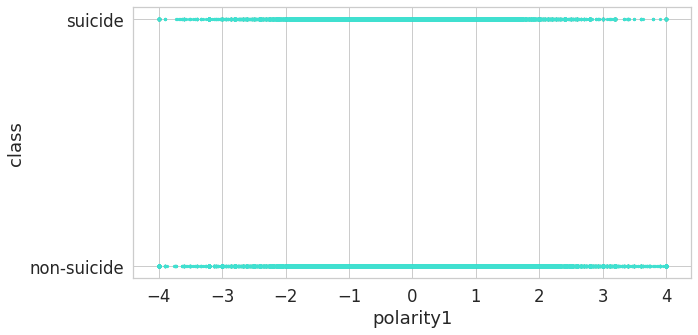

In [ ]:
data1['polarity1']=data1['polarity']*4
data1.plot.scatter(x='polarity1',y='class',c='turquoise',marker='.') ## this column was introduced to understand the pattern since the dataset is huge

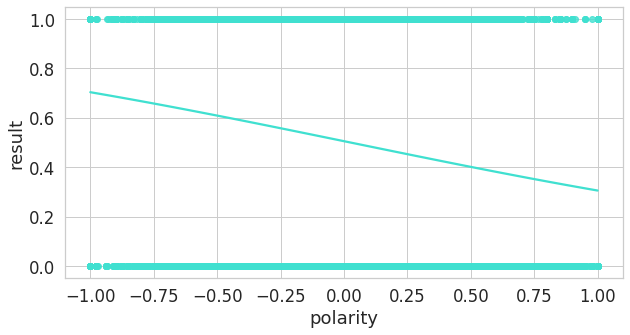

In [ ]:
x=data1['polarity']
y=data1['result']
sns.regplot(x=x, y=y, data=data1, logistic=True, ci=None, color='turquoise')

In [ ]:
data1['sp']=data1['polarity']*data1['subjectivity']

In [ ]:
data1['sp']

0         0.000000
1         0.219489
2        -0.080000
3        -0.007101
4         0.002427
            ...   
232567    0.075000
232568    0.000000
232569   -0.001371
232570    0.006097
232571   -0.051187
Name: sp, Length: 232572, dtype: float64

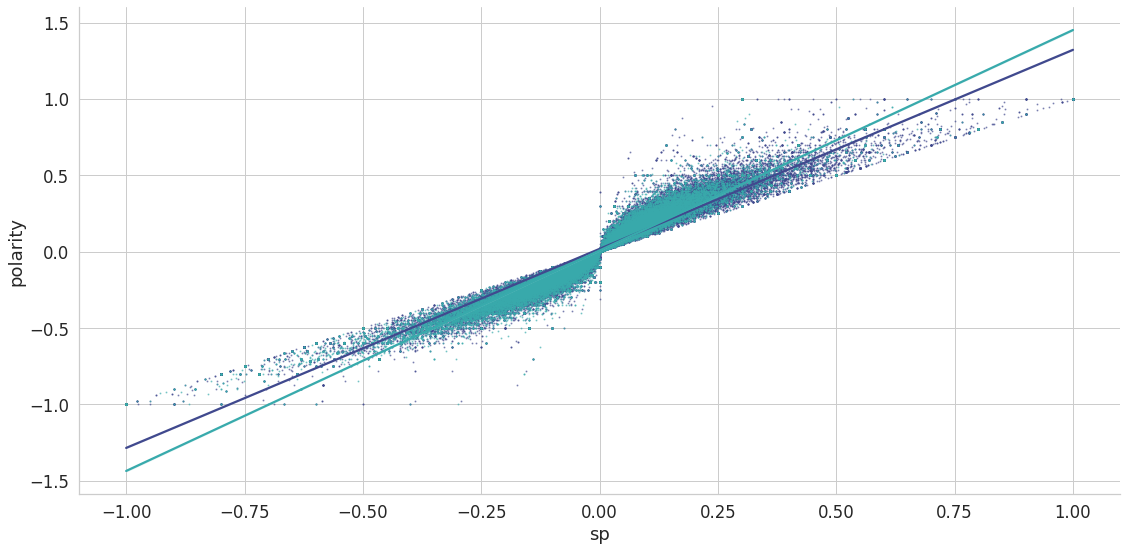

In [ ]:
sns.lmplot(x='sp',y='polarity',data=data1,hue='class',scatter_kws={'s':1,'alpha':0.5},palette='mako', height=8, aspect=2, legend = False)

In [ ]:
data1.to_csv('out.csv')

In [ ]:
data1 = pd.read_csv('out.csv')

In [ ]:
data1.drop('Unnamed: 0', axis = 1, inplace=True)

In [ ]:
data1['text'] = data1['text'].astype(str) 

# Converting text to Bag of Words

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
Text = data1['text']

from nltk.tokenize import word_tokenize

Text = Text.apply(word_tokenize)
Text.head()

0    [guys, way, happend, !, !, !, believe, read, s...
1    [help, april, fools, prank, boyfriend, !, basi...
2    [there, ’, s, 1, million, ants, per, one, pers...
3    [anyone, ps4, i, ’, m, getting, 2, terabyte, e...
4    [never, ready, ..., i, suffering, major, depre...
Name: text, dtype: object

In [ ]:
df = pd.DataFrame({'col':Text})

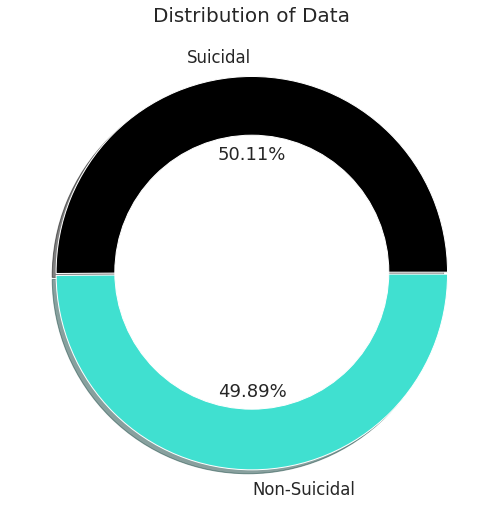

In [ ]:
size = data1['result'].value_counts()
colors = ['black', 'turquoise']
labels = "Suicidal", "Non-Suicidal"
explode = [0, 0.01]

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('Distribution of Data', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
#plt.legend()
plt.show()

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
def lemmatized_words(text):
    lemm = nltk.stem.WordNetLemmatizer()
    df['lemmatized_text'] = list(map(lambda word:
                                     list(map(lemm.lemmatize, word)),
                                     df.col))
    

lemmatized_words(df.col)

In [ ]:
bow_converter = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
x = bow_converter.fit_transform(df['col'])

words = bow_converter.get_feature_names()
len(words)

238506

In [ ]:
data_new = data1.join(df)

In [ ]:
data_new.head()

,text,class,result,polarity,subjectivity,polarity1,sp,col,lemmatized_text
0,guys way happend!!! believe read sentence,non-suicide,0,0.000000,0.000000,0.000000,0.000000,"[guys, way, happend, !, !, !, believe, read, s...","[guy, way, happend, !, !, !, believe, read, se..."
1,help april fools prank boyfriend! basically wo...,non-suicide,0,0.297500,0.737778,1.190000,0.219489,"[help, april, fools, prank, boyfriend, !, basi...","[help, april, fool, prank, boyfriend, !, basic..."
2,there’s 1 million ants per one person ants cou...,non-suicide,0,-0.200000,0.400000,-0.800000,-0.080000,"[there, ’, s, 1, million, ants, per, one, pers...","[there, ’, s, 1, million, ant, per, one, perso..."
3,anyone ps4 i’m getting 2 terabyte external hdd...,non-suicide,0,-0.038462,0.184615,-0.153846,-0.007101,"[anyone, ps4, i, ’, m, getting, 2, terabyte, e...","[anyone, ps4, i, ’, m, getting, 2, terabyte, e..."
4,never ready...i suffering major depressive dis...,suicide,1,0.006250,0.388333,0.025000,0.002427,"[never, ready, ..., i, suffering, major, depre...","[never, ready, ..., i, suffering, major, depre..."


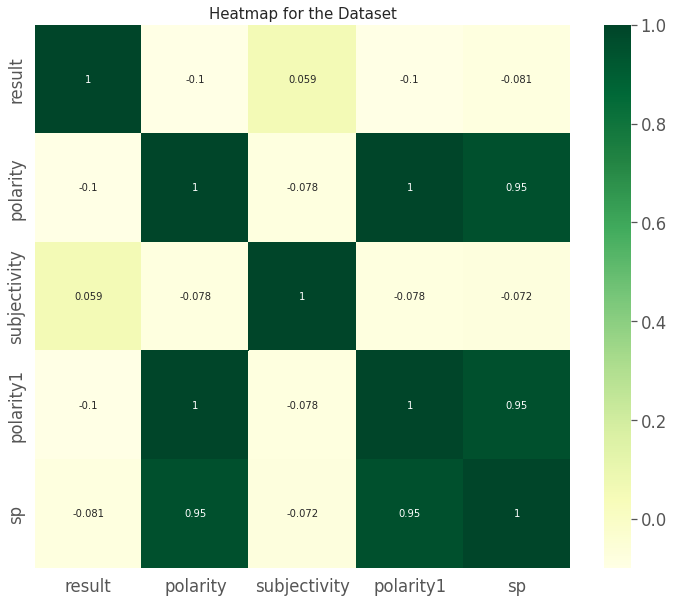

In [ ]:
from matplotlib.pyplot import cm
plt.rcParams['figure.figsize'] = (12, 10)
plt.style.use('ggplot')

sns.heatmap(data_new.corr(), annot = True, cmap = 'YlGn')
plt.title('Heatmap for the Dataset', fontsize = 15)
plt.show()

Train Test

In [ ]:
data_new.drop(['col','text','class','polarity','subjectivity','polarity1'], inplace=True, axis=1)

In [ ]:
X_tr,X_te,y_tr,y_te = train_test_split(data_new[['lemmatized_text','sp']], data_new.result, test_size=0.3, random_state=42)

In [ ]:
transform = CountVectorizer(tokenizer=lambda doc: doc, ngram_range=[3,3], lowercase=False) 

In [ ]:
X_tr = transform.fit_transform(X_tr['lemmatized_text'])

In [ ]:
len(transform.vocabulary_)

7966396

In [ ]:
X_te = transform.transform(X_te['lemmatized_text'])

## Logistic Regression 

In [ ]:
model = LogisticRegression(solver='saga', random_state=2)

In [ ]:
model.fit(X_tr, y_tr)

LogisticRegression(random_state=2, solver='saga')

In [ ]:
y_pred_log = model.predict(X_te)

In [ ]:
model.score(X_tr, y_tr)

0.7134090909090909

In [ ]:
model.score(X_te, y_te)

0.6843862867625982

In [ ]:
confusion_matrix(y_te, y_pred_log)

array([[14074, 20797],
       [ 1224, 33677]])

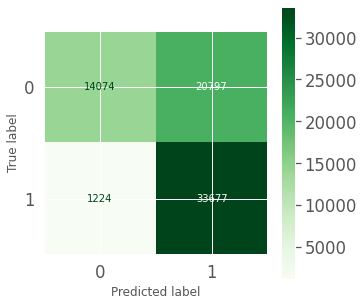

In [ ]:
cm = confusion_matrix(y_te, y_pred_log)
plt.rcParams['figure.figsize'] = (5, 5)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm.plot(cmap=plt.cm.Greens)
plt.show()

In [ ]:
print(classification_report(y_te, y_pred_log))

              precision    recall  f1-score   support

           0       0.92      0.40      0.56     34871
           1       0.62      0.96      0.75     34901

    accuracy                           0.68     69772
   macro avg       0.77      0.68      0.66     69772
weighted avg       0.77      0.68      0.66     69772



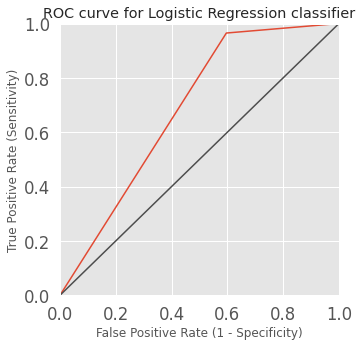

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_te, y_pred_log)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for Logistic Regression classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

## Random Forest

In [ ]:
model_rf = RandomForestClassifier(max_depth=5, random_state=1)

In [ ]:
model_rf.fit(X_tr, y_tr)

RandomForestClassifier(max_depth=5, random_state=1)

In [ ]:
y_pred = model_rf.predict(X_te)

In [ ]:
model_rf.score(X_tr, y_tr)

0.7726719901719902

In [ ]:
model_rf.score(X_te, y_te)

0.7710686235165969

In [ ]:
confusion_matrix(y_te, y_pred)

array([[30841,  4030],
       [11943, 22958]])

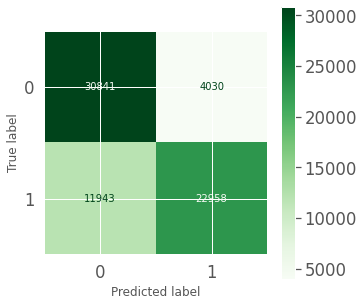

In [ ]:
cm = confusion_matrix(y_te, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm.plot(cmap=plt.cm.Greens)
plt.show()

In [ ]:
print(classification_report(y_te, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79     34871
           1       0.85      0.66      0.74     34901

    accuracy                           0.77     69772
   macro avg       0.79      0.77      0.77     69772
weighted avg       0.79      0.77      0.77     69772



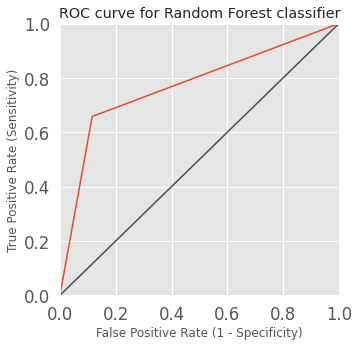

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_te, y_pred)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for Random Forest classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

## MLP

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(6,5), random_state=5,
                    verbose=True,
                    #early_stopping = True,
                    #max_iter = 10,
                    learning_rate_init=0.01)
mlp.fit(X_tr,y_tr)

MLPClassifier(hidden_layer_sizes=(6, 5), learning_rate_init=0.01,
              random_state=5, verbose=True)

In [ ]:
ypred_mlp=mlp.predict(X_te)
from sklearn.metrics import accuracy_score
accuracy_score(y_te,ypred_mlp)

0.8338731869517858

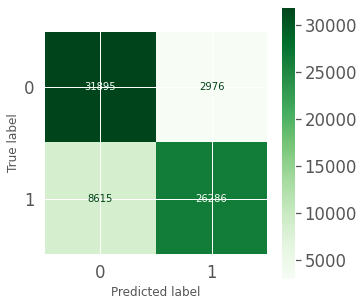

In [ ]:
cm = confusion_matrix(y_te, ypred_mlp)
plt.rcParams['figure.figsize'] = (5, 5)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm.plot(cmap=plt.cm.Greens)
plt.show()

In [ ]:
print(classification_report(y_te, ypred_mlp))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85     34871
           1       0.90      0.75      0.82     34901

    accuracy                           0.83     69772
   macro avg       0.84      0.83      0.83     69772
weighted avg       0.84      0.83      0.83     69772



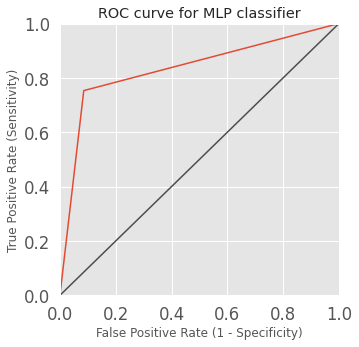

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_te, ypred_mlp)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for MLP classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

Application

In [ ]:
pip install nest_asyncio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nest_asyncio
nest_asyncio.apply()
import json
import os

# Using OS library to call CLI commands in Python

os.system("snscrape --jsonl --max-results 100 twitter-search 'from:ratbastardev'> sucidaltweets.json")
import pandas as pd

tweets_df = pd.read_json('sucidaltweets.json', lines=True)
tweets_df.head()

""


In [ ]:
ladygaga = pd.read_csv('ladygaga.csv')

In [ ]:
ladygaga.head()

,Tweet Id,Text,Name,Screen Name,UTC,Created At,Favorites,Retweets,Language,Client,Tweet Type,URLs,Hashtags,Mentions,Media Type,Media URLs,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,1595478908849205249,CHROMATICA BALL TOUR MERCH AVAILABLE NOW ⚔️💓 h...,Lady Gaga,ladygaga,2022-11-23T18:06:29.000Z,Wed Nov 23 18:06:29 +0000 2022,14334,2141,en,"<a href=""http://twitter.com/download/iphone"" r...",Tweet,http://shop.ladygaga.com,0,0,video,https://video.twimg.com/ext_tw_video/159547793...,NaN,NaN,NaN
1,1592626370034950144,I am so honored to be nominated for 2 Grammys ...,Lady Gaga,ladygaga,2022-11-15T21:11:30.000Z,Tue Nov 15 21:11:30 +0000 2022,48764,6265,en,"<a href=""http://twitter.com/download/iphone"" r...",Tweet,NaN,0,0,NaN,NaN,NaN,NaN,NaN
2,1582442977481195523,RT @BTWFoundation : DRUMROLL PLEASE! 🥁 Born Th...,Lady Gaga,ladygaga,2022-10-18T18:46:20.000Z,Tue Oct 18 18:46:20 +0000 2022,0,0,en,"<a href=""http://twitter.com/download/iphone"" r...",Retweet,https://bornthisway.foundation/advisory-board-...,0,0,animated_gif,https://video.twimg.com/tweet_video/FfXMU_dWQA...,NaN,NaN,NaN
3,1578077374771363840,Each @BTWFoundation Kindness in Community Fund...,Lady Gaga,ladygaga,2022-10-06T17:39:00.000Z,Thu Oct 06 17:39:00 +0000 2022,6693,881,en,"<a href=""http://twitter.com/download/iphone"" r...",Tweet,https://www.channelkindness.org/dispatches-fro...,0,2,NaN,NaN,NaN,NaN,NaN
4,1573100926948122624,Thank you ⁦@TeenVogue⁩ I’m so proud of our ⁦@h...,Lady Gaga,ladygaga,2022-09-23T00:04:22.000Z,Fri Sep 23 00:04:22 +0000 2022,8414,958,en,"<a href=""http://twitter.com/download/iphone"" r...",Tweet,https://www.teenvogue.com/story/best-new-beaut...,0,2,NaN,NaN,NaN,NaN,NaN


In [ ]:
ladygaga.drop(['Tweet Id', 'Name', 'Screen Name', 'UTC', 'Created At',
       'Favorites', 'Retweets', 'Language', 'Client', 'Tweet Type', 'URLs',
       'Hashtags', 'Mentions', 'Media Type', 'Media URLs', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18'], axis=1,inplace=True)

In [ ]:
ladygaga['content'] = ladygaga['Text']

In [ ]:
ladygaga.drop(['Text'],axis=1,inplace=True)

In [ ]:
for columns in ladygaga.columns:
    ladygaga[columns] = ladygaga[columns].str.lower() 

In [ ]:
def sentiment_calc(text):
    try:
        return TextBlob(text).polarity
    except:
        return None

ladygaga['polarity'] = ladygaga['content'].apply(sentiment_calc)

In [ ]:
def sentiment_calc(text):
    try:
        return TextBlob(text).subjectivity
    except:
        return None

ladygaga['subjectivity'] = ladygaga['content'].apply(sentiment_calc)

In [ ]:
ladygaga['sp']=ladygaga['polarity']*ladygaga['subjectivity']

In [ ]:
ladygaga.fillna

<bound method DataFrame.fillna of                                                 content  polarity  \
0     chromatica ball tour merch available now ⚔️💓 h...  0.400000   
1     i am so honored to be nominated for 2 grammys ...  0.233333   
2     rt @btwfoundation : drumroll please! 🥁 born th...  0.142187   
3     each @btwfoundation kindness in community fund...  0.300000   
4     thank you ⁦@teenvogue⁩ i’m so proud of our ⁦@h...  0.484091   
...                                                 ...       ...   
3130  rt @techhofficial : first look: lady gaga as t...  0.250000   
3131  can u blame me for being in love w my assistan...  0.500000   
3132  .@therealdaphne not only the glove in both bla...  0.000000   
3133  let the countdown begin #ahshotel #3weeks 🔪💋- ...  0.000000   
3134  rt @ellemagazine : lady gaga is totally a stag...  0.000000   

      subjectivity        sp  
0         0.400000  0.160000  
1         0.266667  0.062222  
2         0.418750  0.059541  
3         0.5

In [ ]:
ladygaga.head()

,content,polarity,subjectivity,sp
0,chromatica ball tour merch available now ⚔️💓 h...,0.400000,0.400000,0.160000
1,i am so honored to be nominated for 2 grammys ...,0.233333,0.266667,0.062222
2,rt @btwfoundation : drumroll please! 🥁 born th...,0.142187,0.418750,0.059541
3,each @btwfoundation kindness in community fund...,0.300000,0.550000,0.165000
4,thank you ⁦@teenvogue⁩ i’m so proud of our ⁦@h...,0.484091,0.438636,0.212340


In [ ]:
df_ladygaga = ladygaga.copy()
df_ladygaga['content'] = df_ladygaga['content'].astype(str)

In [ ]:
df_ladygaga = pd.DataFrame({'col':Text})

In [ ]:
df_ladygaga.head()

,col
0,"[guys, way, happend, !, !, !, believe, read, s..."
1,"[help, april, fools, prank, boyfriend, !, basi..."
2,"[there, ’, s, 1, million, ants, per, one, pers..."
3,"[anyone, ps4, i, ’, m, getting, 2, terabyte, e..."
4,"[never, ready, ..., i, suffering, major, depre..."


In [ ]:
def lemmatized_words(text):
    lemm = nltk.stem.WordNetLemmatizer()
    df_ladygaga['lemmatized_text'] = list(map(lambda word:
                                     list(map(lemm.lemmatize, word)),
                                     df_ladygaga.col))
    

lemmatized_words(df_ladygaga.col)

In [ ]:
bow_converter = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)
x = bow_converter.fit_transform(df_ladygaga['col'])
words = bow_converter.get_feature_names()
len(words)

238506

In [ ]:
df_ladygaga['ladygaga_text'] = df_ladygaga['lemmatized_text']

In [ ]:
df_ladygaga['res'] = 0

In [ ]:
df_ladygaga_new = df_ladygaga.join(ladygaga)

In [ ]:
df_ladygaga_new.head()

,col,lemmatized_text,ladygaga_text,res,content,polarity,subjectivity,sp
0,"[guys, way, happend, !, !, !, believe, read, s...","[guy, way, happend, !, !, !, believe, read, se...","[guy, way, happend, !, !, !, believe, read, se...",0,chromatica ball tour merch available now ⚔️💓 h...,0.400000,0.400000,0.160000
1,"[help, april, fools, prank, boyfriend, !, basi...","[help, april, fool, prank, boyfriend, !, basic...","[help, april, fool, prank, boyfriend, !, basic...",0,i am so honored to be nominated for 2 grammys ...,0.233333,0.266667,0.062222
2,"[there, ’, s, 1, million, ants, per, one, pers...","[there, ’, s, 1, million, ant, per, one, perso...","[there, ’, s, 1, million, ant, per, one, perso...",0,rt @btwfoundation : drumroll please! 🥁 born th...,0.142187,0.418750,0.059541
3,"[anyone, ps4, i, ’, m, getting, 2, terabyte, e...","[anyone, ps4, i, ’, m, getting, 2, terabyte, e...","[anyone, ps4, i, ’, m, getting, 2, terabyte, e...",0,each @btwfoundation kindness in community fund...,0.300000,0.550000,0.165000
4,"[never, ready, ..., i, suffering, major, depre...","[never, ready, ..., i, suffering, major, depre...","[never, ready, ..., i, suffering, major, depre...",0,thank you ⁦@teenvogue⁩ i’m so proud of our ⁦@h...,0.484091,0.438636,0.212340


In [ ]:
df_ladygaga_new.drop(['col','lemmatized_text', 'content', 'polarity','subjectivity'],axis=1,inplace=True)

In [ ]:
df_ladygaga_new.head()

,ladygaga_text,res,sp
0,"[guy, way, happend, !, !, !, believe, read, se...",0,0.160000
1,"[help, april, fool, prank, boyfriend, !, basic...",0,0.062222
2,"[there, ’, s, 1, million, ant, per, one, perso...",0,0.059541
3,"[anyone, ps4, i, ’, m, getting, 2, terabyte, e...",0,0.165000
4,"[never, ready, ..., i, suffering, major, depre...",0,0.212340


Using RF

In [ ]:
X ,X_test,y_train,y_test = train_test_split(df_ladygaga_new[['ladygaga_text','sp']], df_ladygaga_new.res, test_size=0.3, random_state=42)

In [ ]:
transform = CountVectorizer(tokenizer=lambda doc: doc, ngram_range=[3,3], lowercase=False) 

X = transform.fit_transform(X['ladygaga_text'])

len(transform.vocabulary_)

7966396

In [ ]:
y_pred_ladygaga = model_rf.predict(X)

In [ ]:
model_rf.score(X, y_train)

0.613482800982801

In [ ]:
ypr = pd.DataFrame(y_pred_ladygaga)
frame1=[X_test, ypr]
data_model = pd.merge(ladygaga['content'], ypr, left_index=True, right_index=True)
data_model['prediction'] = data_model[0]
data_model.drop(0, axis = 1, inplace=True)
data_model.head()

,content,prediction
0,chromatica ball tour merch available now ⚔️💓 h...,0
1,i am so honored to be nominated for 2 grammys ...,0
2,rt @btwfoundation : drumroll please! 🥁 born th...,0
3,each @btwfoundation kindness in community fund...,1
4,thank you ⁦@teenvogue⁩ i’m so proud of our ⁦@h...,0


In [ ]:
#pd.set_option('display.max_rows', None)
#data_model.iloc[np.where(data_model['prediction'] == 1)]

In [ ]:
pd.set_option('display.max_colwidth', None)
data_model.iloc[3089]

content       some people just like to drink blood for fun. #ahspremiere #ahsfans #ahshotel https://t.co/emk8lnis0z
prediction                                                                                                        1
Name: 3089, dtype: object

In [ ]:
pd.set_option('display.max_colwidth', None)
data_model.iloc[2965]

content       ok so i'm making thanksgiving cooking plans i need recipes people lets put the internet to good use… https://t.co/rukcbophgf
prediction                                                                                                                               1
Name: 2965, dtype: object

Using MLP

In [ ]:
from sklearn import *

In [ ]:
X_mlp ,X_test_mlp,y_train_mlp,y_test_mlp = train_test_split(df_ladygaga_new[['ladygaga_text','sp']], df_ladygaga_new.res, test_size=0.3, random_state=42)

In [ ]:
transform = CountVectorizer(tokenizer=lambda doc: doc, ngram_range=[3,3], lowercase=False) 

X = transform.fit_transform(X_mlp['ladygaga_text'])

len(transform.vocabulary_)

7966396

In [ ]:
ypred_mlp = mlp.predict(X)

In [ ]:
mlp.score(X, y_train_mlp)

0.5762592137592137

In [ ]:
ypr_mlp = pd.DataFrame(ypred_mlp)
frame1=[X_test_mlp, ypr_mlp]
data_model_mlp = pd.merge(ladygaga['content'], ypr_mlp, left_index=True, right_index=True)
data_model_mlp['prediction'] = data_model_mlp[0]
data_model_mlp.drop(0, axis = 1, inplace=True)
data_model_mlp.head()

,content,prediction
0,chromatica ball tour merch available now ⚔️💓 https://t.co/q5cjyniykz https://t.co/ltzf156tft,0
1,i am so honored to be nominated for 2 grammys for “hold my hand” and the top gun: maverick sountrack with my fellow composers. it’s a real dream to be included in this celebration of music with a song and musical theme so close to my heart thank you ❤️,0
2,"rt @btwfoundation : drumroll please! 🥁 born this way foundation is excited to announce our search for the next class of advisors, and we’re honored to invite you to apply. check out the full eligibility requirements + position description at https://t.co/azphcncxha. applications due 11/20! 💖 https://t.co/aic280ukvh",0
3,"each @btwfoundation kindness in community fund recipient is building a kinder, braver world starting with their own communities 💓 @channelkindness https://t.co/7cubrkik3f https://t.co/sakc1zoscz",1
4,thank you ⁦@teenvogue⁩ i’m so proud of our ⁦@hauslabs⁩ foundation formula we appreciate you 🥹💕\n23 best new beauty products you need to try for the fall season | teen vogue https://t.co/2slruheeag,0


In [ ]:
#pd.set_option('display.max_rows', None)
#data_model_mlp.iloc[np.where(data_model_mlp['prediction'] == 0)]

In [ ]:
pd.set_option('display.max_colwidth', None)
data_model_mlp.iloc[3089]

content       some people just like to drink blood for fun. #ahspremiere #ahsfans #ahshotel https://t.co/emk8lnis0z
prediction                                                                                                        1
Name: 3089, dtype: object

In [ ]:
pd.set_option('display.max_colwidth', None)
data_model_mlp.iloc[3000]

content       help out someone in need today and give back. 1 dollar will make a difference. https://t.co/hbt3am1e7h
prediction                                                                                                         0
Name: 3000, dtype: object